In [3]:
#importing neccessarily libraries 
import numpy as np #for mathematical operations
import pandas as pd #for loading dataset
import matplotlib.pyplot as plt #data visualization
import matplotlib.image as mpimg #loading images and saving plot as images 
from plotly.offline import init_notebook_mode
import seaborn as sns
import plotly.express as px

In [4]:
train_perf = pd.read_csv('trainperf.csv')
train_demo = pd.read_csv('traindemographics.csv')
test_perf = pd.read_csv('testperf.csv')
test_demo = pd.read_csv('testdemographics.csv')
german_credit = pd.read_csv('german_credit_data.csv')

In [5]:
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [6]:
train_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [7]:
test_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


In [8]:
test_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


In [9]:
train = train_perf.merge(right = train_demo, how = 'inner', on = 'customerid')
test = test_perf.merge(right = test_demo, how = 'inner', on = 'customerid')

In [10]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [11]:
train.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [12]:
test.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN
1,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN,1975-08-25 00:00:00.000000,Savings,5.248368,13.059864,UBA,NaN,Permanent,NaN
2,8a858e675c3fe0a1015c44ba8a037fee,301987980,2,14:28.0,14:20.0,10000,11500.0,15,NaN,1994-04-26 00:00:00.000000,Savings,5.288827,7.604053,GT Bank,NaN,Permanent,NaN
3,8a858ec95afc0922015b0edc17e34984,301965287,4,48:41.0,48:26.0,20000,24500.0,30,NaN,1982-04-15 00:00:00.000000,Savings,3.339835,7.118107,GT Bank,NaN,Permanent,NaN
4,8a858f5b5bee1b11015bf1b4ffea5abb,301981908,3,37:48.0,37:41.0,10000,11500.0,15,NaN,1989-05-13 00:00:00.000000,Savings,3.371619,6.605104,GT Bank,NaN,Permanent,NaN


In [13]:
#sorted the df with order_item_id and dropped duplicate ids 
train = train.sort_values(by = 'customerid', ascending = False).drop_duplicates('customerid')

In [14]:
train.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [15]:
train['good_bad_flag'].value_counts()
#there is imbalance class 

Good    2556
Bad      713
Name: good_bad_flag, dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 583 to 333
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  3269 non-null   object 
 1   systemloanid                3269 non-null   int64  
 2   loannumber                  3269 non-null   int64  
 3   approveddate                3269 non-null   object 
 4   creationdate                3269 non-null   object 
 5   loanamount                  3269 non-null   float64
 6   totaldue                    3269 non-null   float64
 7   termdays                    3269 non-null   int64  
 8   referredby                  448 non-null    object 
 9   good_bad_flag               3269 non-null   object 
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           3269 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269

In [18]:
train.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    2821
good_bad_flag                    0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           3236
employment_status_clients      493
level_of_education_clients    2826
dtype: int64

In [19]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
583,8a858fff5c79144c015c7bdbfc086ce1,301967027,2,2017-07-06 19:42:39.000000,2017-07-06 18:42:34.000000,10000.0,13000.0,30,NaN,Good,1989-10-24 00:00:00.000000,Savings,7.224332,8.884774,FCMB,NaN,NaN,NaN
2713,8a858fff5a36fe68015a3b8dcb8a3843,301992274,7,2017-07-23 18:39:10.000000,2017-07-23 17:39:04.000000,30000.0,34500.0,30,NaN,Good,1989-08-30 00:00:00.000000,Savings,3.291219,6.559089,GT Bank,NaN,NaN,NaN
3116,8a858fff5a36fe68015a37f8550a02a2,301989105,7,2017-07-21 11:24:08.000000,2017-07-21 10:24:01.000000,30000.0,34500.0,30,NaN,Good,1987-09-10 00:00:00.000000,Savings,3.491421,6.439399,First Bank,NaN,Permanent,NaN
1342,8a858fff5a28d297015a33bc2e845305,301961209,7,2017-07-03 15:05:14.000000,2017-07-03 14:04:07.000000,30000.0,39000.0,60,NaN,Good,1980-09-04 00:00:00.000000,Savings,6.985570,4.806448,Union Bank,NaN,Permanent,NaN
773,8a858fff5a28d297015a338c644f5053,301966641,5,2017-07-06 15:26:22.000000,2017-07-06 14:26:13.000000,20000.0,24500.0,30,NaN,Good,1987-11-30 00:00:00.000000,Savings,7.498690,9.055047,UBA,NaN,Permanent,NaN


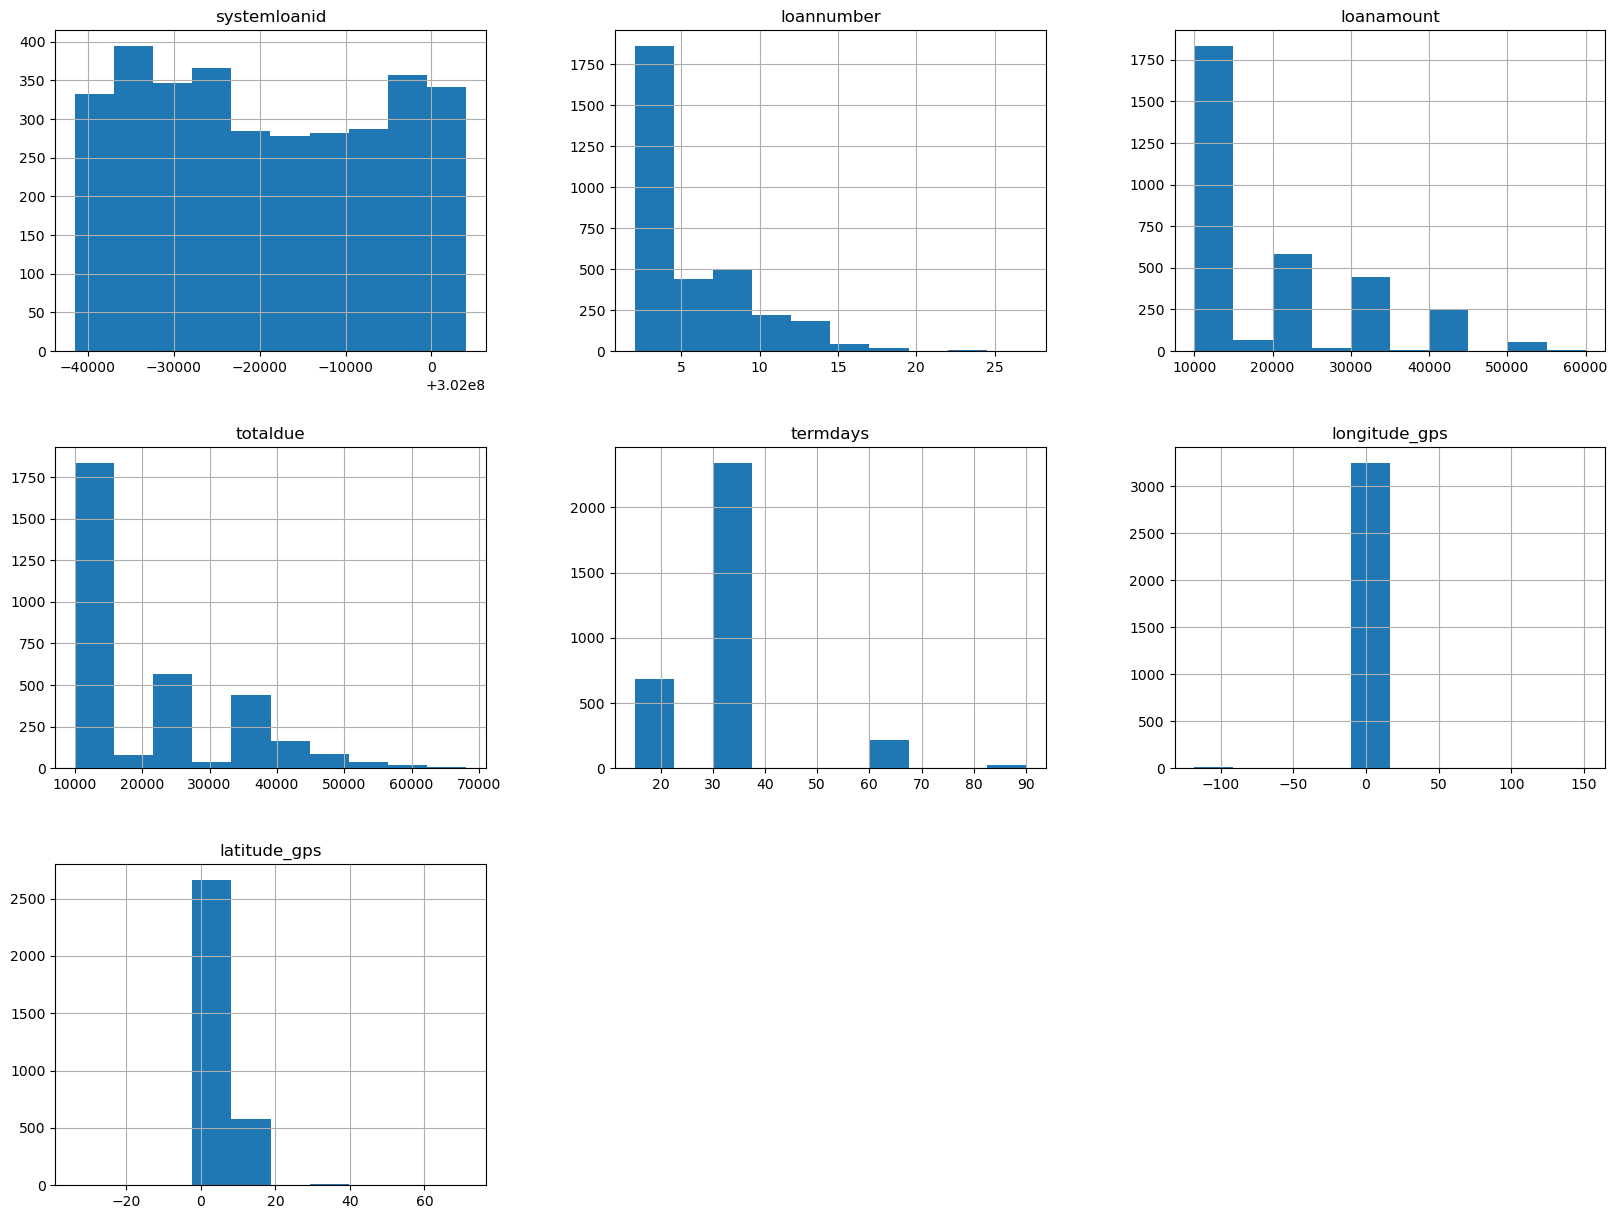

In [20]:
train.hist(figsize=(20,15))
plt.show()

In [21]:
train.select_dtypes(include=['object']).describe()

,customerid,approveddate,creationdate,referredby,good_bad_flag,birthdate,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,3269,3269,3269,448,3269,3269,3269,3269,33,2776,443
unique,3269,3265,3266,407,2,2638,3,18,31,6,4
top,8a858fff5c79144c015c7bdbfc086ce1,2017-07-01 21:13:24.000000,2017-07-26 07:28:00.000000,8a858fc55b2548dd015b286e452c678c,Good,1983-12-16 00:00:00.000000,Savings,GT Bank,OGBA,Permanent,Graduate
freq,1,2,2,6,2556,4,2570,1207,3,2340,321


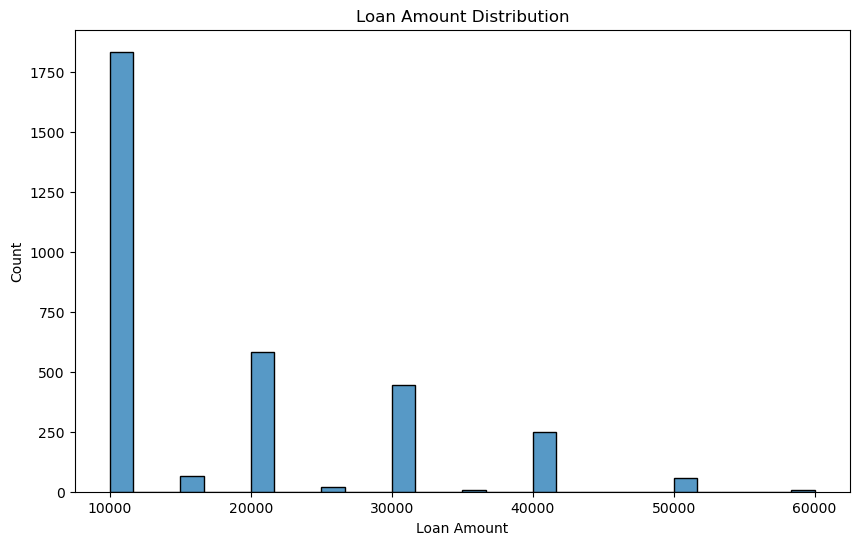

In [22]:
# Histogram of Loan Amount
plt.figure(figsize=(10,6))
sns.histplot(train['loanamount'], kde=False, bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

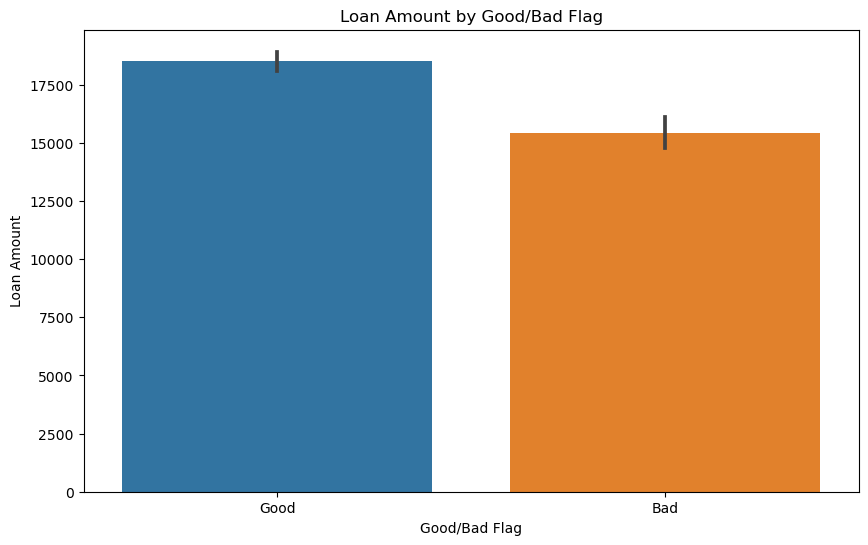

In [23]:
# Boxplot of Loan Amount by Good/Bad Flag
plt.figure(figsize=(10,6))
sns.barplot(x='good_bad_flag', y='loanamount', data=train)
plt.title('Loan Amount by Good/Bad Flag')
plt.xlabel('Good/Bad Flag')
plt.ylabel('Loan Amount')
plt.show()

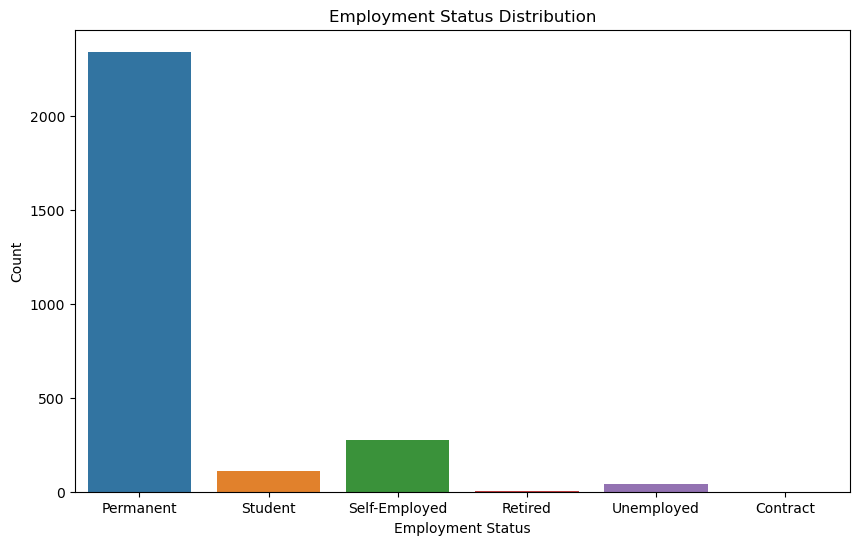

In [24]:
# Countplot of Employment Status
plt.figure(figsize=(10,6))
sns.countplot(x='employment_status_clients', data=train)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

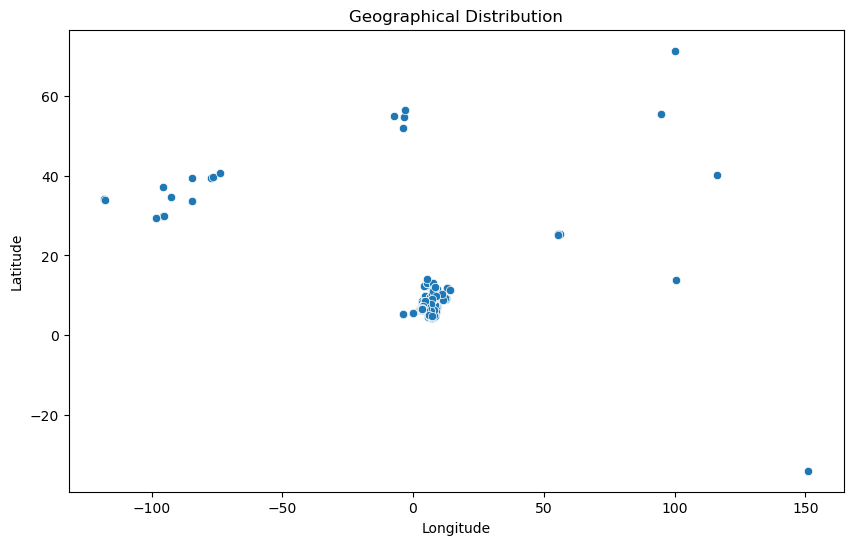

In [25]:
# Scatterplot of Longitude and Latitude
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude_gps', y='latitude_gps', data=train)
plt.title('Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

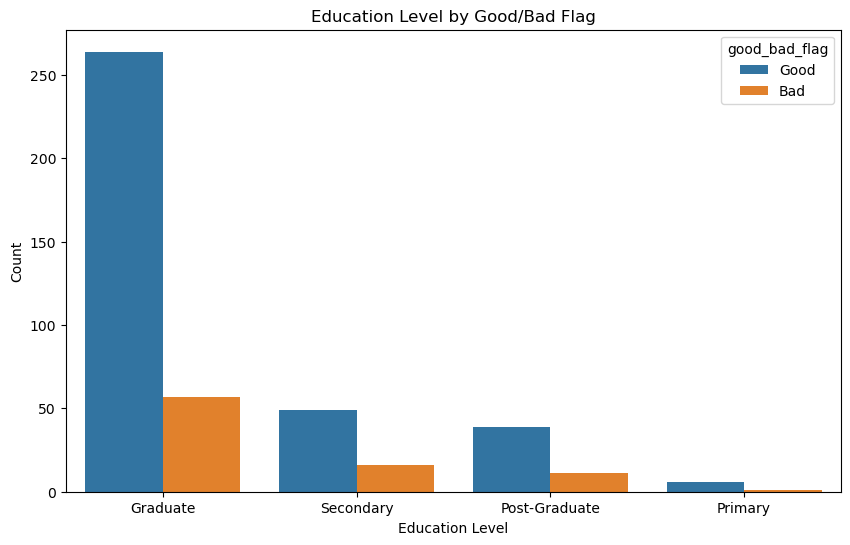

In [26]:
# Countplot of Education Level by Good/Bad Flag
plt.figure(figsize=(10,6))
sns.countplot(x='level_of_education_clients', hue='good_bad_flag', data=train)
plt.title('Education Level by Good/Bad Flag')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [27]:
def fill_missing_values(df):
    # Loop over each column in the dataframe
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Check if column is numeric
            # Fill missing values with mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            # Fill missing values with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

In [28]:
# Fill missing values using the function
train = fill_missing_values(train)

In [29]:
train['approveddate'] = pd.to_datetime(train['approveddate'])
train['creationdate'] = pd.to_datetime(train['creationdate'])

train['approved_year'] = train['approveddate'].dt.year
train['approved_month'] = train['approveddate'].dt.month
train['approved_day'] = train['approveddate'].dt.day
train['approved_dayofweek'] = train['approveddate'].dt.dayofweek
train['approved_weekofyear'] = train['approveddate'].dt.weekofyear

train['creation_year'] = train['creationdate'].dt.year
train['creation_month'] = train['creationdate'].dt.month
train['creation_day'] = train['creationdate'].dt.day
train['creation_dayofweek'] = train['creationdate'].dt.dayofweek
train['creation_weekofyear'] = train['creationdate'].dt.weekofyear

C:\Users\owner\AppData\Local\Temp\ipykernel_11168\691668889.py:8: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

C:\Users\owner\AppData\Local\Temp\ipykernel_11168\691668889.py:14: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [30]:
# Creating ratio of loan amount to total due
train['amount_due_ratio'] = train['loanamount'] / train['totaldue']

# Creating average loan amount for each customer
train['avg_loan_amount'] = train.groupby('customerid')['loanamount'].transform('mean')

# Creating average loan term for each customer
train['avg_loan_term'] = train.groupby('customerid')['termdays'].transform('mean')

In [31]:
train.isnull().sum()

customerid                    0
systemloanid                  0
loannumber                    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
referredby                    0
good_bad_flag                 0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
approved_year                 0
approved_month                0
approved_day                  0
approved_dayofweek            0
approved_weekofyear           0
creation_year                 0
creation_month                0
creation_day                  0
creation_dayofweek            0
creation_weekofyear           0
amount_due_ratio              0
avg_loan_amount               0
avg_loan_term                 0
dtype: i

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 583 to 333
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  3269 non-null   object        
 1   systemloanid                3269 non-null   int64         
 2   loannumber                  3269 non-null   int64         
 3   approveddate                3269 non-null   datetime64[ns]
 4   creationdate                3269 non-null   datetime64[ns]
 5   loanamount                  3269 non-null   float64       
 6   totaldue                    3269 non-null   float64       
 7   termdays                    3269 non-null   int64         
 8   referredby                  3269 non-null   object        
 9   good_bad_flag               3269 non-null   object        
 10  birthdate                   3269 non-null   object        
 11  bank_account_type           3269 non-null   object     

In [33]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df):
    le = LabelEncoder() # create a label encoder object
    
    for col in df.columns:
        if df[col].dtype == 'object': # check if column is of type 'object'
            df[col] = le.fit_transform(df[col].astype(str)) # label encode the column
            
    return df

In [34]:
# Label encode the object-type features using the function
train = label_encode_features(train)

In [35]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,approved_dayofweek,approved_weekofyear,creation_year,creation_month,creation_day,creation_dayofweek,creation_weekofyear,amount_due_ratio,avg_loan_amount,avg_loan_term
583,3268,301967027,2,2017-07-06 19:42:39,2017-07-06 18:42:34,10000.0,13000.0,30,358,1,...,3,27,2017,7,6,3,27,0.769231,10000.0,30.0
2713,3267,301992274,7,2017-07-23 18:39:10,2017-07-23 17:39:04,30000.0,34500.0,30,358,1,...,6,29,2017,7,23,6,29,0.869565,30000.0,30.0
3116,3266,301989105,7,2017-07-21 11:24:08,2017-07-21 10:24:01,30000.0,34500.0,30,358,1,...,4,29,2017,7,21,4,29,0.869565,30000.0,30.0
1342,3265,301961209,7,2017-07-03 15:05:14,2017-07-03 14:04:07,30000.0,39000.0,60,358,1,...,0,27,2017,7,3,0,27,0.769231,30000.0,60.0
773,3264,301966641,5,2017-07-06 15:26:22,2017-07-06 14:26:13,20000.0,24500.0,30,358,1,...,3,27,2017,7,6,3,27,0.816327,20000.0,30.0


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 583 to 333
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  3269 non-null   int32         
 1   systemloanid                3269 non-null   int64         
 2   loannumber                  3269 non-null   int64         
 3   approveddate                3269 non-null   datetime64[ns]
 4   creationdate                3269 non-null   datetime64[ns]
 5   loanamount                  3269 non-null   float64       
 6   totaldue                    3269 non-null   float64       
 7   termdays                    3269 non-null   int64         
 8   referredby                  3269 non-null   int32         
 9   good_bad_flag               3269 non-null   int32         
 10  birthdate                   3269 non-null   int32         
 11  bank_account_type           3269 non-null   int32      

In [43]:
train.drop(['approveddate', 'creationdate'], axis=1, inplace=True)

In [65]:
#handling imbalance multiclass 
X = train.drop(['customerid', 'good_bad_flag'], axis=1)
y = train['good_bad_flag']

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [88]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [89]:
# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)

In [90]:
rf.fit(X_train_res, y_train_res)

# predicting on test data
predics = rf.predict(X_test)

In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

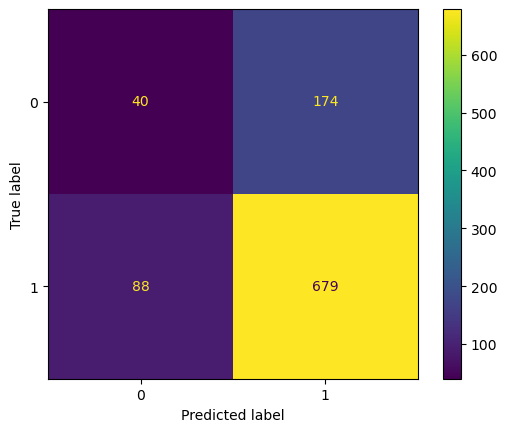

In [92]:
cm = confusion_matrix(y_test, predics)
ConfusionMatrixDisplay(cm).plot()

In [93]:
# classification report on test dataset
classif_re = classification_report(y_test,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.31      0.19      0.23       214
           1       0.80      0.89      0.84       767

    accuracy                           0.73       981
   macro avg       0.55      0.54      0.54       981
weighted avg       0.69      0.73      0.71       981



In [97]:
# Create the classifier and feature selector
X = train.drop(['customerid', 'good_bad_flag'], axis=1)
y = train['good_bad_flag']

clf = RandomForestClassifier(n_estimators=100)
selector = RFE(clf, n_features_to_select=5, step=1)

# Fit the selector to the data
selector = selector.fit(X, y)

# Print the selected features
print("Selected Features: ", X.columns[selector.support_])

# Get the transformed data with only the selected features
X_selected = selector.transform(X)

Selected Features:  Index(['systemloanid', 'birthdate', 'longitude_gps', 'latitude_gps',
       'creation_day'],
      dtype='object')


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create the classifier and fit it to the training data
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7629969418960245

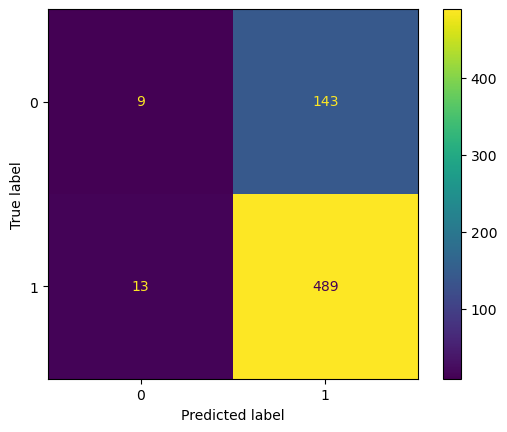

In [111]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.06      0.10       152
           1       0.77      0.97      0.86       502

    accuracy                           0.76       654
   macro avg       0.59      0.52      0.48       654
weighted avg       0.69      0.76      0.69       654



In [123]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
dtc_model = decisionTree.fit(X_train, y_train)
prediction = dtc_model.predict(X_test)
dtc_model.score(X_test, y_test)

0.6376146788990825

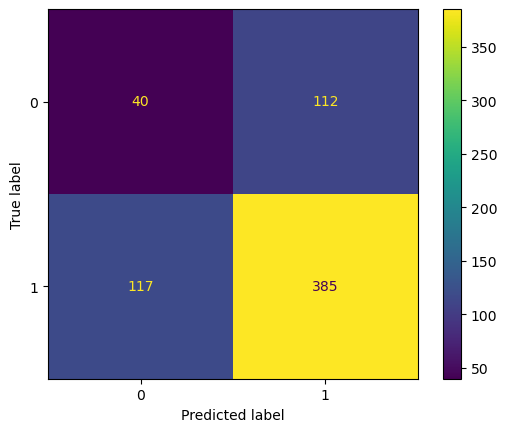

In [115]:
cm = confusion_matrix(y_test, prediction)
ConfusionMatrixDisplay(cm).plot()

In [116]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.25      0.26      0.26       152
           1       0.77      0.77      0.77       502

    accuracy                           0.65       654
   macro avg       0.51      0.52      0.51       654
weighted avg       0.65      0.65      0.65       654



In [122]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
prediction = modelGNB.predict(X_test)
modelGNB.score(X_test, y_test)

0.7675840978593272

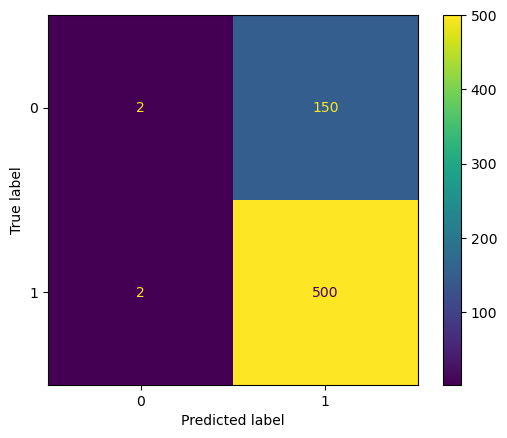

In [118]:
cm = confusion_matrix(y_test, prediction)
ConfusionMatrixDisplay(cm).plot()

In [119]:
# classification report on test dataset
classif_re = classification_report(y_test,prediction)
print(classif_re)

              precision    recall  f1-score   support

           0       0.50      0.01      0.03       152
           1       0.77      1.00      0.87       502

    accuracy                           0.77       654
   macro avg       0.63      0.50      0.45       654
weighted avg       0.71      0.77      0.67       654



In [120]:
from sklearn.ensemble import GradientBoostingClassifier
modelGBC = GradientBoostingClassifier()
modelGBC.fit(X_train, y_train)
modelGBC.score(X_test, y_test)

0.7629969418960245

In [126]:
#make table to compare model's scores
models = [clf, dtc_model, modelGNB, modelGBC]
scores = {"Model":[],"Score":[]}

for m in models:
    scores["Model"].append(f'{m}'.split('(')[0])
    scores["Score"].append(m.score(X_test, y_test))
    
scoress = pd.DataFrame(scores).sort_values(by='Score', ascending=False)
scoress

,Model,Score
2,GaussianNB,0.767584
0,RandomForestClassifier,0.762997
3,GradientBoostingClassifier,0.762997
1,DecisionTreeClassifier,0.637615
